In [1]:
import numpy as np
import matplotlib.pyplot as plt
#getting and sorting data
data = np.loadtxt("/home/icvmuser/Downloads/3year-data-release/IC79-2010-events.txt", skiprows=1)
data = data[data[:,1].argsort()]  #Selects column number
data = data.transpose() #flipping array


In [2]:
energy = data[1]
print(energy)

[2.5625 2.5853 2.6361 ... 6.7726 6.7838 6.8393]


In [3]:
eventsperbin = len(energy)//10
print(eventsperbin)
#Three remain

9313


In [4]:
#Making arrays for each bin
np.set_printoptions(threshold=1000)
bin1 = data[:,:eventsperbin]
bin2 = data[:,9313:18626]
bin3 = data[:,2*eventsperbin:3*eventsperbin]
bin4 = data[:,3*eventsperbin:4*eventsperbin]
bin5 = data[:,4*eventsperbin:5*eventsperbin]
bin6 = data[:,5*eventsperbin:6*eventsperbin]
bin7 = data[:,6*eventsperbin:7*eventsperbin]
bin8 = data[:,7*eventsperbin:8*eventsperbin]
bin9 = data[:,8*eventsperbin:9*eventsperbin]
bin10 = data[:,9*eventsperbin:93130]
print(bin7)

[[ 5.54772836e+04  5.53561709e+04  5.53673025e+04 ...  5.53977529e+04
   5.56224924e+04  5.56513963e+04]
 [ 3.91080000e+00  3.91080000e+00  3.91090000e+00 ...  4.59080000e+00
   4.59090000e+00  4.59090000e+00]
 [ 5.90100000e-01  1.08050000e+00  4.64300000e-01 ...  6.20700000e-01
   7.32500000e-01  1.86200000e-01]
 ...
 [ 3.33812000e+01  1.41160000e+00 -6.69400000e+00 ... -1.18993000e+01
  -1.11698000e+01 -1.36821000e+01]
 [ 2.82209500e+02  1.04908700e+02  1.01033700e+02 ...  2.05595500e+02
   9.92060000e+01  7.42081000e+01]
 [ 1.23406700e+02  9.14403000e+01  8.33629000e+01 ...  7.80952000e+01
   7.88793000e+01  7.63779000e+01]]


In [5]:
#returns a list of random ra and dec histogram values
def null_values(x, y):
    np.random.seed(x)
    randomra = 360 * np.random.random_sample((1, 9313))

    xedges = np.linspace(0, 360, num=90)
    yedges = np.linspace(-90, 90, num=45)

    x = randomra[0]
    y = y

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [6]:
def average_nullvalues(x, y):
    a = null_values(0, y)
    c = np.arange(1, x)
    for item in c:
        b = null_values(item, y)
        a = np.add(a, b)
    average = a / x
    return average.flatten()

In [7]:
average_background10 = average_nullvalues(10000, bin10[4])
average_background9 = average_nullvalues(10000, bin9[4])
average_background8 = average_nullvalues(10000, bin8[4])
average_background7 = average_nullvalues(10000, bin7[4])
average_background6 = average_nullvalues(10000, bin6[4])
average_background5 = average_nullvalues(10000, bin5[4])
average_background4 = average_nullvalues(10000, bin4[4])
average_background3 = average_nullvalues(10000, bin3[4])
average_background2 = average_nullvalues(10000, bin2[4])
average_background1 = average_nullvalues(10000, bin1[4])

In [8]:
#returns a list of observed ra and dec histogram values
def observed_values(thing1, thing2):
    
    xedges = np.linspace(0, 360, num=90)
    yedges = np.linspace(-90, 90, num=45)

    x = thing1
    y = thing2

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [9]:
def null_chi_squared_withseed(x, y, z):
    a = null_values(x, y)
    b = z
    values = np.subtract(a, b)
    values = np.square(values)
    values = np.sum(values)
    return values

In [10]:
def null_chi_squared_distrib(x, y, z, w):
    c = np.array([])
    a = np.arange(x, y)
    for item in a:
        b = null_chi_squared_withseed(item, z, w)
        c = np.append(c, b)
    return c

In [11]:
null_chi10 = null_chi_squared_distrib(0, 10000, bin10[4], average_background10)
null_chi9 = null_chi_squared_distrib(0, 10000, bin9[4], average_background9)
null_chi8 = null_chi_squared_distrib(0, 10000, bin8[4], average_background8)
null_chi7 = null_chi_squared_distrib(0, 10000, bin7[4], average_background7)
null_chi6 = null_chi_squared_distrib(0, 10000, bin6[4], average_background6)
null_chi5 = null_chi_squared_distrib(0, 10000, bin5[4], average_background5)
null_chi4 = null_chi_squared_distrib(0, 10000, bin4[4], average_background4)
null_chi3 = null_chi_squared_distrib(0, 10000, bin3[4], average_background3)
null_chi2 = null_chi_squared_distrib(0, 10000, bin2[4], average_background2)
null_chi1 = null_chi_squared_distrib(0, 10000, bin1[4], average_background1)

In [12]:
#adds counts to a random backgroud array
def add_points_beta(rangestart, rangeend, num_counts, total_counts, thing1, raordec):
    l = np.array([np.linspace(rangestart, rangeend, num=num_counts)])
    random_array = thing1
    random_array = np.append(random_array, l[0])
    return random_array

In [13]:
def add_clusters_beta(num_clusters, num_counts, range_size, sample_max, sample_min, raordec, x):
    if raordec == True:
        a = 360 * np.random.random_sample((1, 9313-((num_counts)*(num_clusters))))
        array_like1 = a[0]
    else:
        a = x
        array_like1 = np.delete(a, np.s_[0:(num_clusters*num_counts)])
    numtimes = (sample_max - sample_min) * np.random.random_sample((1, num_clusters)) + sample_min
    for item in numtimes[0]:
        array_like1 = add_points_beta((item - range_size), item, num_counts, (num_counts)*(num_clusters), array_like1, raordec)
    return array_like1

In [14]:
#arrays cannot have same seed
def alt_values_beta(num_clusters, num_counts, range_size, seed, array):
    np.random.seed(seed)
    xedges = np.linspace(0, 360, num=90)
    yedges = np.linspace(-90, 90, num=45)

    x = add_clusters_beta(num_clusters, num_counts, range_size, 360, 0, True, array)
    y = add_clusters_beta(num_clusters, num_counts, range_size, 90, -90, False, array)

    H, ___, ___= np.histogram2d(x, y, bins=(xedges, yedges))
    return H.flatten()

In [15]:
def alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, seed, array):
    a = x
    b = alt_values_beta(num_clusters, num_counts, range_size, seed, array)
    values = np.subtract(b, a)
    values = np.square(values)
    values = np.sum(values)
    return values

In [16]:
def alt_chi_squared_distrib(y, num_clusters, num_counts, range_size, x, array):
    c = np.array([])
    a = np.arange(y)
    for item in a:
        b = alt_chi_squared_withseed(num_clusters, num_counts, range_size, x, item, array)
        c = np.append(c, b)
    return c

In [17]:
alt_chi10 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background10, bin10[4])
alt_chi9 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background9, bin9[4])
alt_chi8 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background8, bin8[4])
alt_chi7 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background7, bin7[4])
alt_chi6 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background6, bin6[4])
alt_chi5 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background5, bin5[4])
alt_chi4 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background4, bin4[4])
alt_chi3 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background3, bin3[4])
alt_chi2 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background2, bin2[4])
alt_chi1 = alt_chi_squared_distrib(10000, 3, 100, 1, average_background1, bin1[4])

In [18]:
def real_chi_squared(thing1, thing2, a):
    b = observed_values(thing1, thing2)
    values = np.subtract(b, a)
    values = np.square(values)
    values = np.sum(values)
    return values

In [19]:
#chi squared values
chi_1 = real_chi_squared(bin1[3], bin1[4], average_background1)
chi_2 = real_chi_squared(bin2[3], bin2[4], average_background2)
chi_3 = real_chi_squared(bin3[3], bin4[4], average_background3)
chi_4 = real_chi_squared(bin4[3], bin4[4], average_background4)
chi_5 = real_chi_squared(bin5[3], bin5[4], average_background5)
chi_6 = real_chi_squared(bin6[3], bin6[4], average_background6)
chi_7 = real_chi_squared(bin7[3], bin7[4], average_background7)
chi_8 = real_chi_squared(bin8[3], bin8[4], average_background8)
chi_9 = real_chi_squared(bin9[3], bin9[4], average_background9)
chi_10 = real_chi_squared(bin10[3], bin10[4], average_background10)

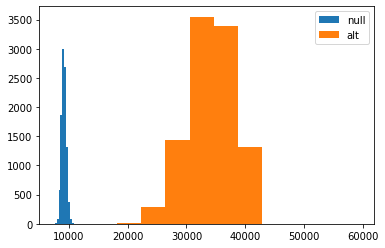

In [21]:
x1 = null_chi10
x2 = alt_chi10

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='r', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

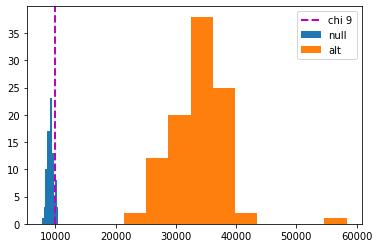

In [77]:
x1 = null_chi9
x2 = alt_chi9

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
ax.axvline(x=chi_9, color='m', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='r', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

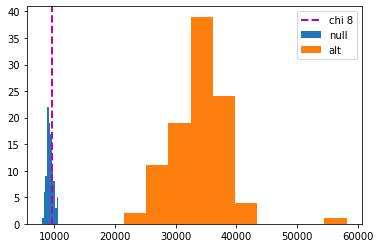

In [78]:
x1 = null_chi8
x2 = alt_chi8

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

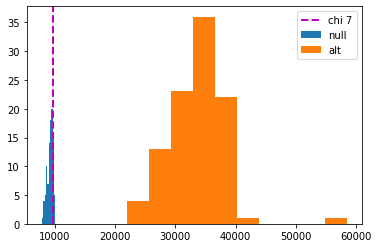

In [79]:
x1 = null_chi7
x2 = alt_chi7

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
ax.axvline(x=chi_7, color='m', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

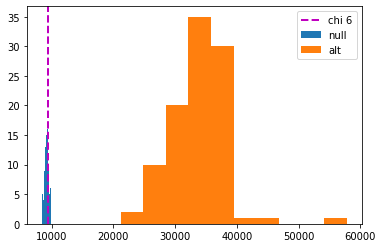

In [80]:
x1 = null_chi6
x2 = alt_chi6

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

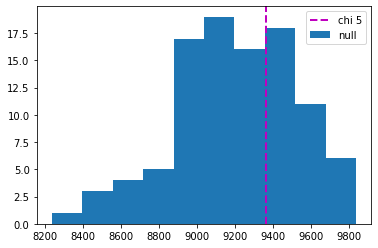

In [21]:
x1 = null_chi5
#x2 = alt_chi5

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
#plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
ax.axvline(x=chi_5, color='m', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

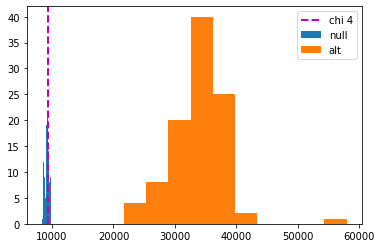

In [82]:
x1 = null_chi4
x2 = alt_chi4

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
ax.axvline(x=chi_4, color='m', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

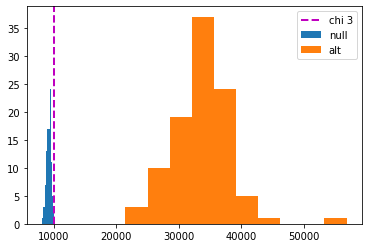

In [83]:
x1 = null_chi3
x2 = alt_chi3

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
ax.axvline(x=chi_3, color='m', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

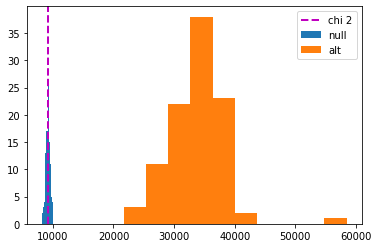

In [84]:
x1 = null_chi2
x2 = alt_chi2

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
ax.axvline(x=chi_2, color='m', linestyle='dashed', linewidth=2, label='chi 2')
#ax.axvline(x=chi_1, color='grey', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

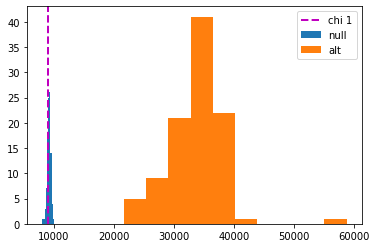

In [85]:
x1 = null_chi1
x2 = alt_chi1

fig, ax = plt.subplots()
plt.hist(x1, bins=10, label='null')
plt.hist(x2, bins=10, label='alt')
#ax.axvline(x=chi_10, color='m', linestyle='dashed', linewidth=2, label='chi 10')
#ax.axvline(x=chi_9, color='b', linestyle='dashed', linewidth=2, label='chi 9')
#ax.axvline(x=chi_8, color='m', linestyle='dashed', linewidth=2, label='chi 8')
#ax.axvline(x=chi_7, color='c', linestyle='dashed', linewidth=2, label='chi 7')
#ax.axvline(x=chi_6, color='m', linestyle='dashed', linewidth=2, label='chi 6')
#ax.axvline(x=chi_5, color='y', linestyle='dashed', linewidth=2, label='chi 5')
#ax.axvline(x=chi_4, color='k', linestyle='dashed', linewidth=2, label='chi 4')
#ax.axvline(x=chi_3, color='tab:orange', linestyle='dashed', linewidth=2, label='chi 3')
#ax.axvline(x=chi_2, color='tab:brown', linestyle='dashed', linewidth=2, label='chi 2')
ax.axvline(x=chi_1, color='m', linestyle='dashed', linewidth=2, label='chi 1')

ax.legend()

plt.show()

In [17]:
def p_value(x, null_distrib):
    thing1 = 0
    for item in null_distrib:
        if item > x:
            thing1 = thing1 + 1
    thing2 = thing1/10000
    return thing2

In [18]:
def reverse_p_value(x, null_distrib):
    thing1 = x * 10000
    thing1 = int(thing1)
    null_distrib = np.sort(null_distrib)
    thing2 = null_distrib[(10000-thing1):10000]
    return thing2[0]

In [19]:
reverse_p_value(0.0013, null_chi10)

10501.79364632

In [19]:
def lots_reversep(x):
    thing1 = np.array([])
    thing2 = np.array([null_chi1, null_chi2, null_chi3, null_chi4, null_chi5, null_chi6, null_chi7, null_chi8, null_chi9, null_chi10])
    for item in thing2:
        thing3 = reverse_p_value(x, item)
        thing1 = np.append(thing3, thing1)
    return thing1

In [20]:
lots_reversep(0.0013)

array([10501.79364632, 10735.9117715 , 10945.43111562, 10850.2278636 ,
       10374.8438031 , 10318.35151132, 10331.8110815 , 10310.2372269 ,
       10251.41764046, 10177.36566864])

In [21]:
def percent_sensitivity(num_seeds, num_clusters, num_counts, range, bckgd, dec, p, null_distrib):
    x = reverse_p_value(p, null_distrib)
    y = 0
    z = alt_chi_squared_distrib(num_seeds, num_clusters, num_counts, range, bckgd, dec)
    for item in z:
        if item > x:
            y = y + 1
    thing1 = y/num_seeds
    return thing1   

In [23]:
percent_sensitivity(10000, 1, 55, 1, average_background10, bin10[4], 0.0013, null_chi10)

0.9166

In [22]:
thing2 = np.array([])
len(thing2)

0

In [22]:
def reverse_sensitivity(z, x, avgbkgd, dec, p, null_distrib):
    thing1 = np.arange(z, x)
    thing2 = np.array([])
    for item in thing1:
        thing3 = percent_sensitivity(10000, 1, item, 1, avgbkgd, dec, p, null_distrib)
        if thing3 > 0.9:
            thing2 = np.append(thing3, thing2)
    num = x - z
    num2 = len(thing2)
    if num2 == 0:
        num3 = 'None'
    else:
        num3 = num - num2 + z
    return num3

In [24]:
cluster_sensitivity10 = reverse_sensitivity(40, 61, average_background10, bin10[4], 0.0013, null_chi10)

54

In [23]:
cluster_sensitivity9 = reverse_sensitivity(40, 61, average_background9, bin9[4], 0.0013, null_chi9)

59

In [26]:
cluster_sensitivity8 = reverse_sensitivity(40, 68, average_background8, bin8[4], 0.0013, null_chi8)

62

In [27]:
cluster_sensitivity7 = reverse_sensitivity(40, 65, average_background7, bin7[4], 0.0013, null_chi7)

61

In [25]:
cluster_sensitivity6 = reverse_sensitivity(45, 61, average_background6, bin6[4], 0.0013, null_chi6)

51

In [28]:
cluster_sensitivity5 = reverse_sensitivity(40, 65, average_background5, bin5[4], 0.0013, null_chi5)

51

In [29]:
cluster_sensitivity4 = reverse_sensitivity(40, 61, average_background4, bin4[4], 0.0013, null_chi4)

51

In [30]:
cluster_sensitivity3 = reverse_sensitivity(30, 61, average_background3, bin3[4], 0.0013, null_chi3)

50

In [31]:
cluster_sensitivity2 = reverse_sensitivity(40, 61, average_background2, bin2[4], 0.0013, null_chi2)

49

In [32]:
cluster_sensitivity1 = reverse_sensitivity(40, 61, average_background1, bin1[4], 0.0013, null_chi1)

47

In [26]:
thing1 = np.array([average_background10, average_background9, average_background8, average_background7, average_background6, average_background5, average_background4, average_background3, average_background2, average_background1])
thing2 = np.array([null_chi1, null_chi2, null_chi3, null_chi4, null_chi5, null_chi6, null_chi7, null_chi8, null_chi9, null_chi10])
thing3 = np.array([bin10[4], bin9[4], bin8[4], bin7[4], bin6[4], bin5[4], bin4[4], bin3[4], bin2[4], bin1[4]])

In [27]:
def lots_reverse_sensitivity(z, x, p):
    thing0 = np.array([])
    thing4 = np.arange(0,11)
    for item in thing4:
        thing5 = reverse_sensitivity(z, x, thing1[item], thing3[item], p, thing2[item])
        thing0 = np.append(thing5, thing0)
    return thing0

In [ ]:
lots_reverse_sensitivity(40, 61, 0.0013)